In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import pickle
import os
import re
import seaborn as sns
from sklearn import metrics
sns.set_style('white')
sns.set_palette('colorblind')

In [2]:
def attention_single_file(filename):
    with open(filename, 'rb') as file_:
        result = pickle.load(file_)
    return result

In [3]:
def prediction_filenames(dirname):
    return [run_prediction for run_prediction in os.listdir(dirname)
            if os.path.isfile(os.path.join(dirname, run_prediction)) and 'predictions' in run_prediction]

In [4]:
def labels_single_file(filename):
    result = pandas.read_csv(filename, sep='\t')
    return result

In [74]:
classifier = '18-08-24-00-16'
partition = 2
dataset = 'dev'
att_matrix = attention_single_file(
    '../../results/ukpnets/paragraph/{}/attention_partition{}_ukp_{}.p'.format(classifier, partition, dataset))
prediction = labels_single_file(
    '../../results/ukpnets/paragraph/{}/predictions_partition{}_ukp_{}.conll'.format(classifier, partition, dataset))
prediction.loc[:,'Attention Score'] = numpy.abs(numpy.concatenate(att_matrix['ukp']))
prediction.loc[:, 'Correct'] = (prediction.Predicted == prediction['True'])

In [75]:
prediction['Attention Score'].describe()

count    2291.000000
mean        0.051413
std         0.025392
min         0.000030
25%         0.032224
50%         0.053136
75%         0.071266
max         0.130416
Name: Attention Score, dtype: float64

/home/mteruel/miniconda3/envs/env_am/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


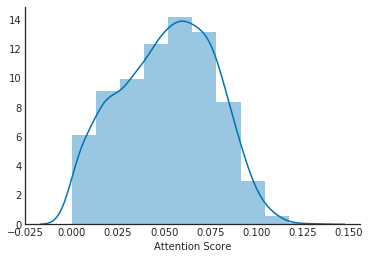

In [89]:
sns.distplot(prediction['Attention Score'], bins=10)
sns.despine()

In [77]:
prediction[425:470]

,Token,True,Predicted,Sentence,Attention Score,Correct
425,The,O,O,24,0.046823,True
426,Government,O,O,24,0.037001,True
427,argued,O,O,24,0.073392,True
428,that,O,O,24,0.005062,True
429,the,B-claim,O,24,0.045079,False
430,applicant,I-claim,O,24,0.026113,False
431,had,I-claim,O,24,0.024222,False
432,failed,I-claim,O,24,0.019503,False
433,to,I-claim,O,24,0.032100,False
434,exhaust,I-claim,I-premise,24,0.034603,False


In [78]:
import json

In [79]:
json_words = json.dumps(
    prediction[['Token', 'Attention Score', 'Sentence', 'Predicted', 'Correct']].values.tolist()[350:800]
)

In [80]:
json_words[:300]

'[["appeal", 0.04819009080529213, 20, "I-premise", false], ["on", 0.043208785355091095, 20, "I-premise", false], ["points", 0.06443527340888977, 20, "I-premise", false], ["of", 0.02929561398923397, 20, "I-premise", false], ["law", 0.07048629224300385, 20, "I-premise", false], ["without", 0.0469904616'

How to run D3 on Jupyter

It is still a mistery, and sometimes it does not work, but this worked https://blog.thedataincubator.com/2015/08/embedding-d3-in-an-ipython-notebook/


In [81]:
from IPython.core.display import display, HTML
from string import Template
import json

In [82]:
HTML('<script src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.16/d3.min.js"></script>')

In [83]:
HTML('<script src="https://d3js.org/d3-color.v1.min.js"></script>')

In [84]:
HTML('<script src="https://d3js.org/d3-interpolate.v1.min.js"></script>')

In [85]:
HTML('<script src="https://d3js.org/d3-scale-chromatic.v1.min.js"></script>')

In [86]:
HTML('<script src="textChart.js"></script>')

In [87]:
HTML("""<script>
if (d3 === undefined) {
    alert('No d3 library');
}
if (TextChart === undefined) {
    alert('No Chart library');
}
</script>""")

In [88]:
js_text_template = Template('''
var nouns = JSON.parse('$json_data');

opts = {
  lineHeight: 16,
  width: 900,
  height: 600,
  linePadding: 10,
  useColor: false,
  labelColors: {
    'B-claim': '#FF5964',  // Red
    'I-claim': '#FF5964',
    'B-premise': '#35A7FF',  // Blue
    'I-premise': '#35A7FF',
    'O': '#888888'
  }
}
chart = new TextChart(nouns, opts);
chart.draw('text-container');
''')

html_template = Template('''
    <div id='text-container'></div>
    <script src="textChart.js"></script>
    <script>$js_text</script>
''')

js_text = js_text_template.substitute({
    'json_data': json_words
})

HTML(html_template.substitute({'js_text': js_text}))